---
# Predictive Business Loan Default Analysis Model
---

**Author**: Dhevina Tailor

**Contact**: [dhevinatailor@gmail.com](mailto:dhevinatailor@gmail.com)

**Date**: November 10, 2023

## Table of Contents
---
1. [Introduction: Data Preprocessing](#introduction)
2. [Loading and Setup](#loadingandsetup)
3. [Data Assessment and Cleaning](#assessment)
4. [Feature Engineering](#feature)
5. [Handling Imbalanced Data](#imbalanced)
6. [Baseline Modeling](#baseline)
7. [Conclusion and Next Steps](#conclusion)
8. [Saving the Data](#saving)

## Introduction: Data Preprocessing <a class="anchor" id="introduction"></a>
---
Data preprocessing is a crucial step in any data science project. It ensures that the dataset is clean, well-structured, and ready for modeling. This phase involves addressing data quality issues, feature engineering, and preparing the dataset for advanced modeling techniques. The accuracy and reliability of predictive models in financial risk assessment heavily depend on the quality of the input data. Therefore, our preprocessing goals include:

1. **Data Cleaning**: Rectifying issues such as missing values, outliers, and inconsistencies.
2. **Feature Engineering**: Enhancing the dataset with new features or transforming existing ones to improve model performance.
3. **Data Transformation**: Including encoding categorical variables, scaling features, and addressing class imbalances.

By accomplishing these steps, we lay a solid foundation for building robust and accurate predictive models.


## Loading and Setup <a class="anchor" id="loadingandsetup"></a>

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Get Data

In [2]:
# Load the dataset
df = pd.read_csv("Explored_Loan_Data.csv")

# Display the first few rows of the dataset
df.head()

,Name,City,State,Bank,BankState,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,MIS_Status,SBA_Appv
0,ABC HOBBYCRAFT,EVANSVILLE,IN,FIFTH THIRD BANK,OH,451120,4,2.0,1,0,N,Paid,48000.0
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,1ST SOURCE BANK,IN,722410,2,2.0,1,0,N,Paid,32000.0
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,621210,7,1.0,1,0,N,Paid,215250.0
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,0,2,1.0,1,0,N,Paid,28000.0
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,0,14,1.0,1,0,N,Paid,229000.0


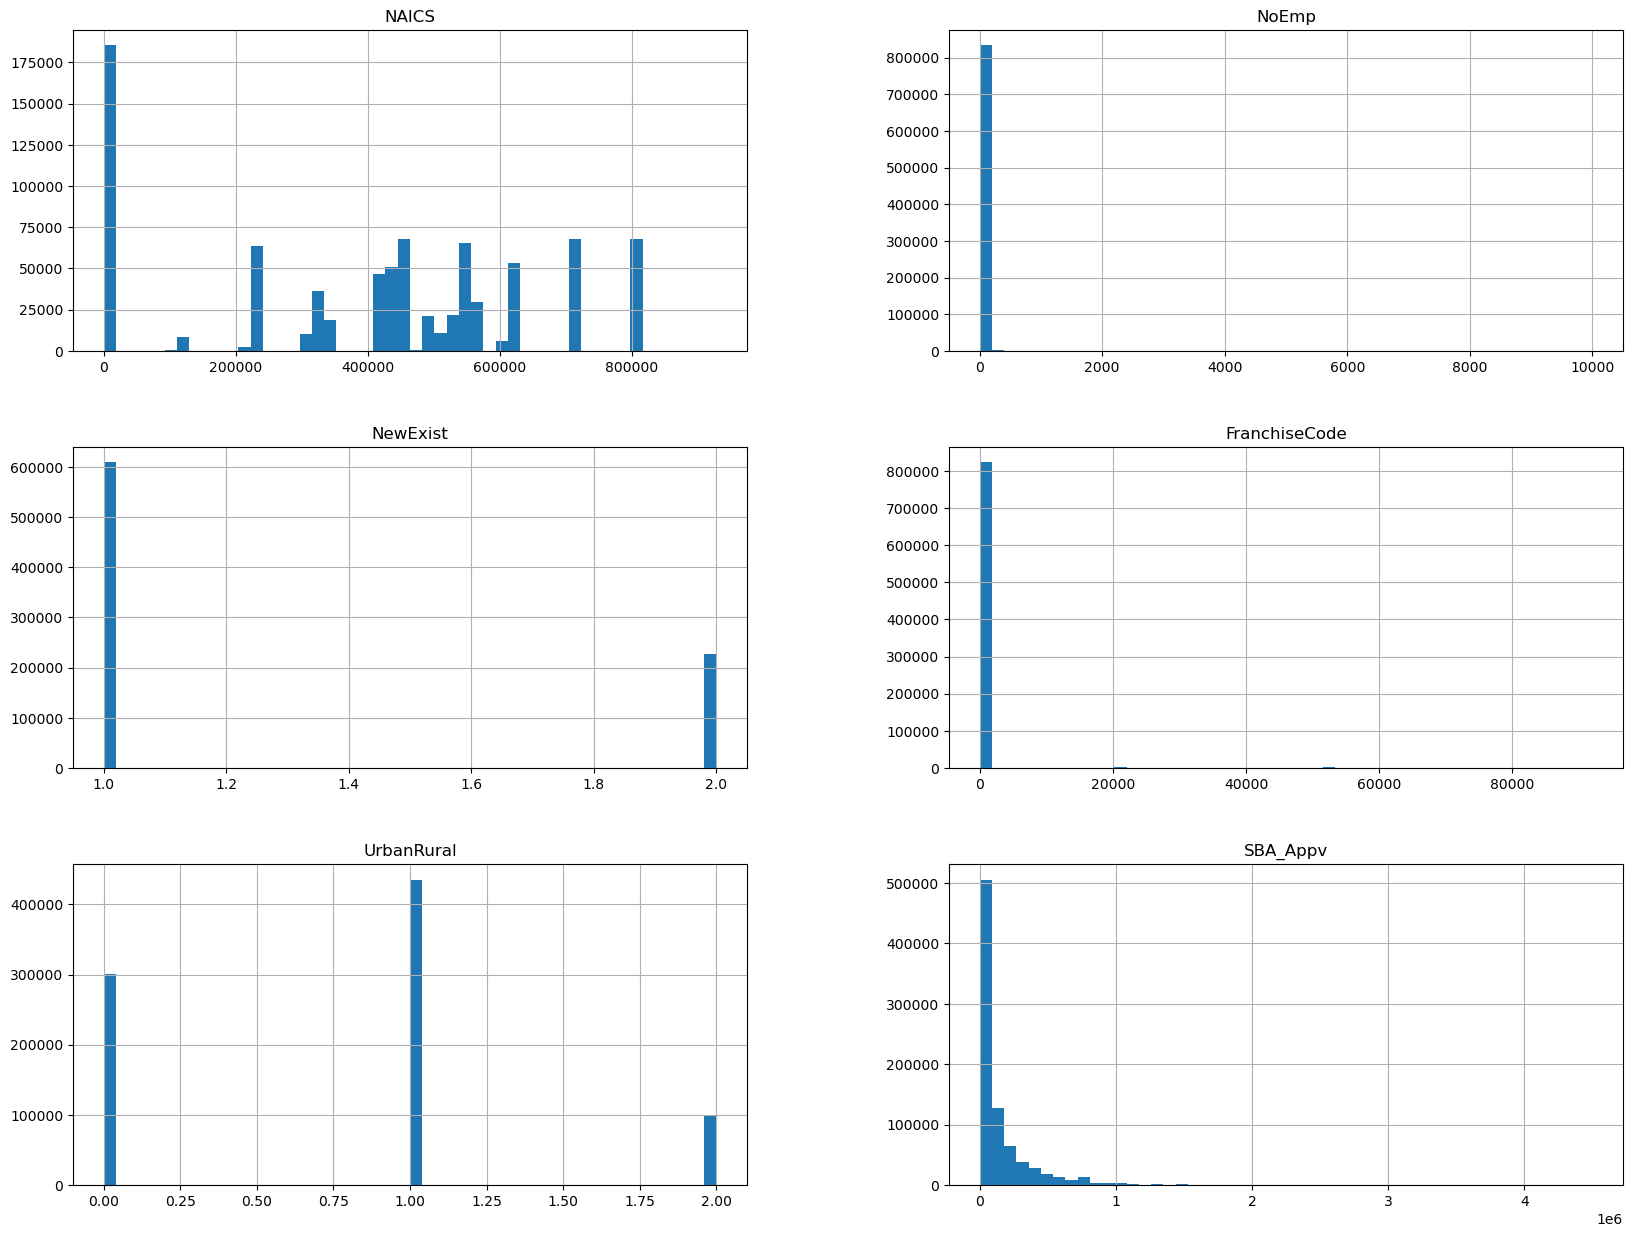

In [3]:
# Visualizing the data distribution
df.hist(bins=50, figsize=(20,15))
plt.show()

We can see that SBA_Appv is skewed to the right. We have addressed the rest in EDA file.

## Data Assessment and Cleaning <a class="anchor" id="assessment"></a>
Our initial assessment focuses on identifying duplicates, irrelevant features, and data inconsistencies. Features like 'City', 'State', and 'Bank' have been dropped due to their high cardinality, which can lead to model overfitting and increased computational complexity. The dataset is then cleaned to remove these columns and any duplicate entries, ensuring data quality and consistency.

In [4]:
def eda_summary(df):
    '''
    Basic EDA function
    '''
    print(f"Rows: {df.shape[0]}")
    print(f"Columns: {df.shape[1]}")
    print(f"Missing values: {df.isna().sum().sum()}")
    print(f"Duplicated rows: {df.duplicated().sum()}")

In [5]:
eda_summary(df)

Rows: 835240
Columns: 13
Missing values: 0
Duplicated rows: 0


Inspecting Categorical columns for unique values prior to creating dummy variables

In [6]:
# Calculate and display the number of unique values in the 'City' column.
unique_values_count = df['City'].nunique()
print(f'Number of unique values in City: {unique_values_count}')

Number of unique values in City: 31734


Will remove the `City` column since it contains an extensive set of 31,734 unique values to avoid potential overfitting.

In [7]:
# Display the number of duplicates before any operations
print(f"Number of duplicates before dropping 'City': {df.duplicated().sum()}")

# Drop the 'City' column
df = df.drop('City', axis=1)

# Check for duplicates after dropping 'City' column
duplicates_after_drop = df[df.duplicated()]

# Display the number of duplicates after dropping 'City'
print(f"Number of duplicates after dropping 'City': {duplicates_after_drop.shape[0]}")

# Display some of the duplicated rows for inspection
print("Sample of duplicated rows:")
print(duplicates_after_drop.head())


Number of duplicates before dropping 'City': 0
Number of duplicates after dropping 'City': 110
Sample of duplicated rows:
                         Name State                       Bank BankState  \
103480                The Kut    AL  BUSINESS LOAN CENTER, LLC        FL   
108351    Aquariumsource, LLC    IL  BUSINESS LOAN CENTER, LLC        FL   
122816  J.L.Y COMPUTERS, INC.    IL   CITIZENS BANK NATL ASSOC        RI   
138924       Kidz Expressions    NC  BUSINESS LOAN CENTER, LLC        FL   
160830             KEYNET INC    NH   CITIZENS BANK NATL ASSOC        NH   

         NAICS  NoEmp  NewExist  FranchiseCode  UrbanRural RevLineCr  \
103480  812112      1       1.0              0           1         N   
108351  454111      1       2.0              0           1         N   
122816  443120      2       1.0              0           1         N   
138924  448130      1       2.0              0           1         N   
160830  541511      2       1.0              1           0   

To mitigate overfitting, I will be removing redundant entries.

In [8]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [9]:
eda_summary(df)

Rows: 835130
Columns: 12
Missing values: 0
Duplicated rows: 0


In [10]:
df.head()

,Name,State,Bank,BankState,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,MIS_Status,SBA_Appv
0,ABC HOBBYCRAFT,IN,FIFTH THIRD BANK,OH,451120,4,2.0,1,0,N,Paid,48000.0
1,LANDMARK BAR & GRILLE (THE),IN,1ST SOURCE BANK,IN,722410,2,2.0,1,0,N,Paid,32000.0
2,"WHITLOCK DDS, TODD M.",IN,GRANT COUNTY STATE BANK,IN,621210,7,1.0,1,0,N,Paid,215250.0
3,"BIG BUCKS PAWN & JEWELRY, LLC",OK,1ST NATL BK & TR CO OF BROKEN,OK,0,2,1.0,1,0,N,Paid,28000.0
4,"ANASTASIA CONFECTIONS, INC.",FL,FLORIDA BUS. DEVEL CORP,FL,0,14,1.0,1,0,N,Paid,229000.0


In [11]:
# Calculate and display the number of unique values in the 'State' column.
unique_values_count = df['State'].nunique()
print(f'Number of unique values in State: {unique_values_count}')

Number of unique values in State: 51


Will remove the `State` column since it contains an extensive set of 51 unique values to avoid potential overfitting.

In [12]:
# Display the number of duplicates before any operations
print(f"Number of duplicates before dropping 'State': {df.duplicated().sum()}")

# Drop the 'State' column
df = df.drop('State', axis=1)

# Check for duplicates after dropping 'State' column
duplicates_after_drop = df[df.duplicated()]

# Display the number of duplicates after dropping 'State'
print(f"Number of duplicates after dropping 'State': {duplicates_after_drop.shape[0]}")

# Display some of the duplicated rows for inspection
print("Sample of duplicated rows:")
print(duplicates_after_drop.head())

Number of duplicates before dropping 'State': 0
Number of duplicates after dropping 'State': 50
Sample of duplicated rows:
                                Name                            Bank  \
69178   HORIZON MEDICAL TECHNOLOGIES      BANK OF AMERICA NATL ASSOC   
124257                 Candy Bouquet       BUSINESS LOAN CENTER, LLC   
157877                   MATCO TOOLS  CITICAPITAL SMALL BUS. FINANCE   
182443                   MATCO TOOLS  CITICAPITAL SMALL BUS. FINANCE   
194738                  MASSAGE ENVY     BANCO POPULAR NORTH AMERICA   

       BankState   NAICS  NoEmp  NewExist  FranchiseCode  UrbanRural  \
69178         WA       0      9       1.0              1           0   
124257        FL  445292      1       2.0              0           1   
157877        TX       0      1       2.0          52000           0   
182443        TX       0      1       2.0          52000           0   
194738        NY  621399      2       2.0          51720           1   

       RevL

To mitigate overfitting, I will be removing redundant entries.

In [13]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [14]:
eda_summary(df)

Rows: 835080
Columns: 11
Missing values: 0
Duplicated rows: 0


In [15]:
df.head()

,Name,Bank,BankState,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,MIS_Status,SBA_Appv
0,ABC HOBBYCRAFT,FIFTH THIRD BANK,OH,451120,4,2.0,1,0,N,Paid,48000.0
1,LANDMARK BAR & GRILLE (THE),1ST SOURCE BANK,IN,722410,2,2.0,1,0,N,Paid,32000.0
2,"WHITLOCK DDS, TODD M.",GRANT COUNTY STATE BANK,IN,621210,7,1.0,1,0,N,Paid,215250.0
3,"BIG BUCKS PAWN & JEWELRY, LLC",1ST NATL BK & TR CO OF BROKEN,OK,0,2,1.0,1,0,N,Paid,28000.0
4,"ANASTASIA CONFECTIONS, INC.",FLORIDA BUS. DEVEL CORP,FL,0,14,1.0,1,0,N,Paid,229000.0


In [16]:
# Calculate and display the number of unique values in the 'Bank' column.
unique_values_count = df['Bank'].nunique()
print(f'Number of unique values in Bank: {unique_values_count}')

Number of unique values in Bank: 5720


Will remove the `Bank` column since it contains an extensive set of 5,720 unique values to avoid potential overfitting.

In [17]:
# Display the number of duplicates before any operations
print(f"Number of duplicates before dropping 'Bank': {df.duplicated().sum()}")

# Drop the 'Bank' column
df = df.drop('Bank', axis=1)

# Check for duplicates after dropping 'Bank' column
duplicates_after_drop = df[df.duplicated()]

# Display the number of duplicates after dropping 'Bank'
print(f"Number of duplicates after dropping 'Bank': {duplicates_after_drop.shape[0]}")

# Display some of the duplicated rows for inspection
print("Sample of duplicated rows:")
print(duplicates_after_drop.head())

Number of duplicates before dropping 'Bank': 0
Number of duplicates after dropping 'Bank': 29
Sample of duplicated rows:
                                  Name BankState   NAICS  NoEmp  NewExist  \
140718     Hometown Sleep Center, Inc.        CA  442110      4       1.0   
149783  AUTHORIZED DISTRIBUTOR MATCO T        TX       0      1       2.0   
149936  AUTHORIZED DISTRIBUTOR MATCO T        TX       0      1       2.0   
194874            VENDING OF TEXAS LLC        CA  454210      2       1.0   
301172                    Balzer, Inc.        WI  333111     79       1.0   

        FranchiseCode  UrbanRural RevLineCr MIS_Status   SBA_Appv  
140718              0           1         Y    Default    25000.0  
149783          52000           0         0    Default    44000.0  
149936          52000           0         0       Paid    44000.0  
194874              1           1         0       Paid     8500.0  
301172              1           2         Y       Paid  1500000.0  


To mitigate overfitting, I will be removing redundant entries.

In [18]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [19]:
eda_summary(df)

Rows: 835051
Columns: 10
Missing values: 0
Duplicated rows: 0


In [20]:
# View updated df
df.head()

,Name,BankState,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,MIS_Status,SBA_Appv
0,ABC HOBBYCRAFT,OH,451120,4,2.0,1,0,N,Paid,48000.0
1,LANDMARK BAR & GRILLE (THE),IN,722410,2,2.0,1,0,N,Paid,32000.0
2,"WHITLOCK DDS, TODD M.",IN,621210,7,1.0,1,0,N,Paid,215250.0
3,"BIG BUCKS PAWN & JEWELRY, LLC",OK,0,2,1.0,1,0,N,Paid,28000.0
4,"ANASTASIA CONFECTIONS, INC.",FL,0,14,1.0,1,0,N,Paid,229000.0


In [21]:
# Calculate and display the number of unique values in the 'BankState'column.
unique_values_count = df['BankState'].nunique()
print(f'Number of unique values in BankState: {unique_values_count}')

Number of unique values in BankState: 56


Will remove the `BankState` column since it contains an extensive set of 56 unique values to avoid potential overfitting.

In [22]:
# Display the number of duplicates before any operations
print(f"Number of duplicates before dropping 'BankState': {df.duplicated().sum()}")

# Drop the 'Bank' column
df = df.drop('BankState', axis=1)

# Check for duplicates after dropping 'BankState' column
duplicates_after_drop = df[df.duplicated()]

# Display the number of duplicates after dropping 'BankState'
print(f"Number of duplicates after dropping 'BankState': {duplicates_after_drop.shape[0]}")

# Display some of the duplicated rows for inspection
print("Sample of duplicated rows:")
print(duplicates_after_drop.head())

Number of duplicates before dropping 'BankState': 0
Number of duplicates after dropping 'BankState': 129
Sample of duplicated rows:
                                 Name   NAICS  NoEmp  NewExist  FranchiseCode  \
8751    Speech Technology Associates,  511210      7       2.0              1   
40183  NORTHEAST BUILDERS & REMODELER  236118      6       1.0              1   
58910             B & B Handbags Inc.  424330      6       1.0              0   
81797                 MINUTEMAN PRESS       0      4       1.0          53650   
89153       Americus Engineering, LC.  541330      1       1.0              0   

       UrbanRural RevLineCr MIS_Status  SBA_Appv  
8751            2         N       Paid   50000.0  
40183           1         N       Paid   25000.0  
58910           1         Y       Paid   25000.0  
81797           0         N       Paid   80000.0  
89153           1         N    Default   21250.0  


To mitigate overfitting, I will be removing redundant entries.

In [23]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [24]:
eda_summary(df)

Rows: 834922
Columns: 9
Missing values: 0
Duplicated rows: 0


In [25]:
# View updated df
df.head()

,Name,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,MIS_Status,SBA_Appv
0,ABC HOBBYCRAFT,451120,4,2.0,1,0,N,Paid,48000.0
1,LANDMARK BAR & GRILLE (THE),722410,2,2.0,1,0,N,Paid,32000.0
2,"WHITLOCK DDS, TODD M.",621210,7,1.0,1,0,N,Paid,215250.0
3,"BIG BUCKS PAWN & JEWELRY, LLC",0,2,1.0,1,0,N,Paid,28000.0
4,"ANASTASIA CONFECTIONS, INC.",0,14,1.0,1,0,N,Paid,229000.0


In [26]:
# Calculate and display the number of unique values in the 'NAICS' column.
unique_values_count = df['NAICS'].nunique()
print(f'Number of unique values in NAICS: {unique_values_count}')

Number of unique values in NAICS: 1311


In [27]:
# View the unique values
unique_values = df['NAICS'].unique()
unique_values

array([451120, 722410, 621210, ..., 315280, 922140, 221121])

We can categorize this according to each industry so we will not drop the `NAICS` column.

In [28]:
# Calculate and display the number of unique values in the 'NoEmp' column.
unique_values_count = df['NoEmp'].nunique()
print(f'Number of unique values in NoEmp: {unique_values_count}')

Number of unique values in NoEmp: 585


In [29]:
# View the unique values
unique_values = df['NoEmp'].unique()
unique_values

array([   4,    2,    7,   14,   19,   45,    1,    3,   24,    5,   16,
         12,    6,   90,   18,    9,   20,   10,    8,   50,   17,   32,
         31,   60,   22,   40,   72,   55,   30,   25,   46,   15,  214,
         28,   23,   11,   13,  112,   26,   42,   65,   21,   97,  100,
        200,  126,   48,   33,   58,   38,   35,    0,   75,   36,   70,
         66,   27, 2000,   56,   34,   93,  150,   29,   41,  290,   67,
         44,   47,  119,   39,  155,   54,   49,   82,   95,  300,   51,
         80,  120,  265,  133,   86,   37,   68,   61,  220,   43,  160,
         71,   98,  350,   78,  233,  263,   62, 7941,   63,  210,  125,
        107,  450,   85,  165,  130, 9992,   77,   64,  424,  257,   52,
        600,  190,  142,   99,   59,   73,  135,   74,  250,   69,  500,
        140,  116,  260,   96,  339,   87,  110,  161,   88,   53,  400,
       2725,  605,   57,  103,   91,   81,  147,  144,  175,  136,  182,
        156,  118,  375,   94,  345,  121,  145,  1

In [30]:
# Calculate and display the number of unique values in the 'NewExist' column.
unique_values_count = df['NewExist'].nunique()
print(f'Number of unique values in NewExist: {unique_values_count}')

Number of unique values in NewExist: 2


In [31]:
# Calculate and display the number of unique values in the 'FranchiseCode' column.
unique_values_count = df['FranchiseCode'].nunique()
print(f'Number of unique values in FranchiseCode: {unique_values_count}')

Number of unique values in FranchiseCode: 719


In [32]:
# View the unique values
unique_values = df['FranchiseCode'].unique()
unique_values

array([    1,     0, 22470, 21425, 21400, 23997, 51570, 81612, 81965,
       23379, 22475, 21420, 23000, 72590, 71456, 44081, 52000, 21780,
       42520, 45455, 81630, 53250, 56480, 62343, 52956, 55120, 61400,
       49952,  4516, 56837, 45479, 33570, 61901, 33550, 62753, 61900,
       21790, 48450, 31150,  9202, 22678, 81602, 55512, 56885, 52018,
       48000, 32074, 55185, 54600, 53165, 45150, 22680, 71658, 21800,
       53657, 33750, 22676, 51720, 55960, 45890, 71685, 11245,  2105,
       56920, 54100, 45505, 53650, 33170, 52707, 81550, 45100, 72515,
       62907, 32077, 81800, 42533, 31243, 45495, 31300, 32195,  5650,
       52875, 32130, 55524, 61401, 55193, 61897, 21660, 48260, 33470,
       42599, 11250, 21870, 44350, 51778, 31415, 52300, 56880, 52855,
        4250, 45955, 44725, 51560,  2357, 56925, 45915, 49855,  9201,
       48400, 62346, 62751, 71158, 81597, 54400, 61390, 62100, 42580,
       55955, 81570, 53680, 72683, 23375, 62760, 61603, 56575,  6140,
       54005, 32125,

Will remove the `FranchiseCode` column since it contains an extensive set of 719 unique values to avoid potential overfitting.

In [33]:
# Display the number of duplicates before any operations
print(f"Number of duplicates before dropping 'FranchiseCode': {df.duplicated().sum()}")

# Drop the 'FranchiseCode' column
df = df.drop('FranchiseCode', axis=1)

# Check for duplicates after dropping 'FranchiseCode' column
duplicates_after_drop = df[df.duplicated()]

# Display the number of duplicates after dropping 'FranchiseCode'
print(f"Number of duplicates after dropping 'FranchiseCode': {duplicates_after_drop.shape[0]}")

# Display some of the duplicated rows for inspection
print("Sample of duplicated rows:")
print(duplicates_after_drop.head())

Number of duplicates before dropping 'FranchiseCode': 0
Number of duplicates after dropping 'FranchiseCode': 46
Sample of duplicated rows:
                                 Name   NAICS  NoEmp  NewExist  UrbanRural  \
43108             DOLLY MADISON, INC.  722110     15       1.0           2   
51197  Severy Brothers Property Manag  812990      2       1.0           2   
58493     SAMME AUTOMOTIVE GROUP, LLC  811111     10       1.0           1   
69056                     MERRY MAIDS       0      1       2.0           0   
75603   TAXATION WITH REPRESENTATION,  541219      1       2.0           1   

      RevLineCr MIS_Status  SBA_Appv  
43108         N       Paid   22500.0  
51197         N       Paid    3250.0  
58493         Y    Default   12500.0  
69056         0       Paid    7750.0  
75603         N    Default   12750.0  


To mitigate overfitting, I will be removing redundant entries.

In [34]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [35]:
eda_summary(df)

Rows: 834876
Columns: 8
Missing values: 0
Duplicated rows: 0


In [36]:
# View updated df
df.head()

,Name,NAICS,NoEmp,NewExist,UrbanRural,RevLineCr,MIS_Status,SBA_Appv
0,ABC HOBBYCRAFT,451120,4,2.0,0,N,Paid,48000.0
1,LANDMARK BAR & GRILLE (THE),722410,2,2.0,0,N,Paid,32000.0
2,"WHITLOCK DDS, TODD M.",621210,7,1.0,0,N,Paid,215250.0
3,"BIG BUCKS PAWN & JEWELRY, LLC",0,2,1.0,0,N,Paid,28000.0
4,"ANASTASIA CONFECTIONS, INC.",0,14,1.0,0,N,Paid,229000.0


In [37]:
# Calculate and display the number of unique values in the 'UrbanRural' column.
unique_values_count = df['UrbanRural'].nunique()
print(f'Number of unique values in UrbanRural: {unique_values_count}')

Number of unique values in UrbanRural: 3


In [38]:
# View the unique values
unique_values = df['UrbanRural'].unique()
unique_values

array([0, 1, 2])

In [39]:
# Calculate and display the number of unique values in the 'RevLineCr' column.
unique_values_count = df['RevLineCr'].nunique()
print(f'Number of unique values in RevLineCr: {unique_values_count}')

Number of unique values in RevLineCr: 3


In [40]:
# View the unique values
unique_values = df['RevLineCr'].unique()
unique_values

array(['N', '0', 'Y'], dtype=object)

In [41]:
# Calculate and display the number of unique values in the 'MIS_Status' column.
unique_values_count = df['MIS_Status'].nunique()
print(f'Number of unique values in MIS_Status: {unique_values_count}')

Number of unique values in MIS_Status: 2


In [42]:
eda_summary(df)

Rows: 834876
Columns: 8
Missing values: 0
Duplicated rows: 0


In [43]:
# Calculate and display the number of unique values in the 'FranchiseCode' column.
unique_values_count = df['Name'].nunique()
print(f'Number of unique values in Name: {unique_values_count}')

Number of unique values in Name: 741337


Will remove the `Name` column since it contains an extensive set of 741,337 unique values to avoid potential overfitting.

In [44]:
# Display the number of duplicates before any operations
print(f"Number of duplicates before dropping 'Name': {df.duplicated().sum()}")

# Drop the 'Name' column
df = df.drop('Name', axis=1)

# Check for duplicates after dropping 'Name' column
duplicates_after_drop = df[df.duplicated()]

# Display the number of duplicates after dropping 'Name'
print(f"Number of duplicates after dropping 'Name': {duplicates_after_drop.shape[0]}")

# Display some of the duplicated rows for inspection
print("Sample of duplicated rows:")
print(duplicates_after_drop.head())

Number of duplicates before dropping 'Name': 0
Number of duplicates after dropping 'Name': 213811
Sample of duplicated rows:
     NAICS  NoEmp  NewExist  UrbanRural RevLineCr MIS_Status  SBA_Appv
84       0      4       1.0           0         0       Paid   12500.0
86       0      3       1.0           0         0       Paid   12500.0
96       0      5       1.0           0         0       Paid   30000.0
97       0      3       1.0           0         0       Paid    5000.0
118      0      3       1.0           0         0       Paid    5000.0


In [45]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

### Dropping Duplicates in the Dataset

In the provided dataset snippet, it appears that rows are duplicated, with identical values across various columns, particularly in the industry-specific dummy variables. It seems that businesses from the same industry result in the same dataset entries. Given this pattern, there are valid reasons to drop these duplicates:

1. **Redundancy:** The duplicated rows provide redundant information, as the values in all columns are identical except for the "NoEmp" column. Keeping them doesn't add any new insights or contribute to the analysis.

2. **Data Efficiency:** Removing duplicates improves data efficiency by reducing the dataset size without sacrificing information. This is particularly valuable when working with large datasets.

3. **Model Performance:** Duplicates may lead to biased model training and evaluation, as the model could give undue importance to repeated patterns. Removing duplicates helps ensure a fair representation of the data.

4. **Data Consistency:** Keeping duplicates may introduce inconsistencies, especially if future data updates include modifications to only one instance of a duplicate. Removing duplicates maintains data consistency.

5. **Industry-specific Duplicates:** The observed pattern, where businesses from the same industry have identical values, further reinforces the rationale for dropping duplicates. It appears that businesses from the same industry result in the same dataset entries.

Therefore, dropping these duplicates can enhance the quality, efficiency, and reliability of the dataset for further analysis or modeling purposes.


In [46]:
eda_summary(df)

Rows: 621065
Columns: 7
Missing values: 0
Duplicated rows: 0


In [47]:
df.head()

,NAICS,NoEmp,NewExist,UrbanRural,RevLineCr,MIS_Status,SBA_Appv
0,451120,4,2.0,0,N,Paid,48000.0
1,722410,2,2.0,0,N,Paid,32000.0
2,621210,7,1.0,0,N,Paid,215250.0
3,0,2,1.0,0,N,Paid,28000.0
4,0,14,1.0,0,N,Paid,229000.0


In [48]:
# Check for duplicates in the entire DataFrame
duplicates = df.duplicated()

# Display rows with duplicates
duplicate_rows = df[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)

# Display the count of duplicates
print("Number of Duplicate Rows:", len(duplicate_rows))

Duplicate Rows:
Empty DataFrame
Columns: [NAICS, NoEmp, NewExist, UrbanRural, RevLineCr, MIS_Status, SBA_Appv]
Index: []
Number of Duplicate Rows: 0


## Feature Engineering: Mapping and Dummy Variable Creation <a class="anchor" id="feature"></a>

### Exploring and Categorizing NAICS Data

We aim to explore and categorize businesses based on their NAICS (North American Industry Classification System) codes. The NAICS codes provide a standardized way of classifying businesses into different industries.

#### NAICS (North American Industry Classification System)

The NAICS codes are numeric representations that classify businesses into specific industry sectors. Each code corresponds to a particular industry or sector.

### Data Preprocessing

#### Mapping NAICS Codes to Sectors

To make the data more interpretable, we map the numeric NAICS codes to broader industry sectors. This mapping helps create a new 'Sector' column in the DataFrame.

#### Creating Dummy Variables

We use the `pd.get_dummies` function to create binary dummy variables for each sector. These dummy variables represent the presence or absence of a specific sector for each business.

#### Integer Representation

To improve readability, we convert the dummy variables to integers (0 or 1) instead of True/False.

### Result

The final DataFrame includes the original business data along with binary dummy variables representing each sector. Additionally, an 'Undefined Sector' category is used for businesses with unknown or undefined NAICS codes.

### Conclusion

This preprocessing step allows for a clearer analysis of businesses based on their industry sectors, providing a foundation for further exploration and modeling.


In [49]:
# To create dummy variables from the `NAICS` column. We map the industries in the NAICS column.
industry_mapping = {
    '11': 'Agriculture',
    '21': 'Mining',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',    
    '42': 'Wholesale trade',
    '44': 'Retail trade',
    '45': 'Retail trade',
    '48': 'Transportation',
    '49': 'Transportation',
    '51': 'Information',
    '52': 'Finance and insurance',
    '53': 'Real estate',
    '54': 'Professional services',
    '55': 'Management of companies',
    '56': 'Administrative services',
    '61': 'Educational services',
    '62': 'Healthcare',
    '71': 'Arts and recreation',
    '72': 'Accommodation and food services',
    '81': 'Other services',
    '92': 'Public administration',
    '00': 'Undefined Industry'
}

# Create a new 'Industry' column based on the first two digits of 'NAICS'
df['Industry'] = df['NAICS'].astype(str).str[:2].map(industry_mapping).fillna('Undefined Industry')

# Create dummy variables for the 'Industry' column
industry_dummies = pd.get_dummies(df['Industry'], prefix='Industry', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, industry_dummies], axis=1)

# Convert dummy variables to integer type
df[industry_dummies.columns] = df[industry_dummies.columns].astype(int)

# Drop the original 'NAICS' and 'Industry' columns
df = df.drop(['NAICS', 'Industry'], axis=1)

# Now, we have binary dummy variables representing each industry, with 'Undefined Industry;.

In [50]:
df.head()

,NoEmp,NewExist,UrbanRural,RevLineCr,MIS_Status,SBA_Appv,Industry_Administrative services,Industry_Agriculture,Industry_Arts and recreation,Industry_Construction,...,Industry_Mining,Industry_Other services,Industry_Professional services,Industry_Public administration,Industry_Real estate,Industry_Retail trade,Industry_Transportation,Industry_Undefined Industry,Industry_Utilities,Industry_Wholesale trade
0,4,2.0,0,N,Paid,48000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,2.0,0,N,Paid,32000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,1.0,0,N,Paid,215250.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1.0,0,N,Paid,28000.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,14,1.0,0,N,Paid,229000.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
# Sanity check
eda_summary(df)

Rows: 621065
Columns: 26
Missing values: 0
Duplicated rows: 175491


In order to avoid overfitting, I'll be eliminating duplicate entries in the dataset. This step is necessary as it ensures that repeated entries for the same business are removed, reducing redundancy and potential overfitting issues.

In [52]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [53]:
# Sanity check
eda_summary(df)

Rows: 445574
Columns: 26
Missing values: 0
Duplicated rows: 0


### `NoEmp` Column
The "NoEmp" column requires no modifications since it is a numerical column.

### Transforming 'NewExist' Column

We aim to transform the 'NewExist' column in our DataFrame, which originally contains values representing whether a business is existing or new (1 for existing, 2 for new). This method replaces values in the selected 'NewExist' column. Specifically, it replaces 1 with 0, indicating an existing business, and 2 with 1, indicating a new business.

In [54]:
# To transform values
df['NewExist'] = df['NewExist'].replace({1: 0, 2: 1})

In [55]:
df.head()

,NoEmp,NewExist,UrbanRural,RevLineCr,MIS_Status,SBA_Appv,Industry_Administrative services,Industry_Agriculture,Industry_Arts and recreation,Industry_Construction,...,Industry_Mining,Industry_Other services,Industry_Professional services,Industry_Public administration,Industry_Real estate,Industry_Retail trade,Industry_Transportation,Industry_Undefined Industry,Industry_Utilities,Industry_Wholesale trade
0,4,1.0,0,N,Paid,48000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1.0,0,N,Paid,32000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0.0,0,N,Paid,215250.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0.0,0,N,Paid,28000.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,14,0.0,0,N,Paid,229000.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
# Sanity check
eda_summary(df)

Rows: 445574
Columns: 26
Missing values: 0
Duplicated rows: 0


### Creating Dummy Variables for `UrbanRural` Column

In this code segment, we are generating dummy variables for the 'UrbanRural' column, which categorizes businesses based on their urban or rural locations.

- **1 (Urban):** Indicates that the business is located in an urban area.
- **2 (Rural):** Indicates that the business is located in a rural area.
- **0 (Undefined):** Represents an undefined or missing value.

#### Dummy Variable Creation

We employ the `pd.get_dummies` function to convert the 'UrbanRural' column into dummy variables. This includes creating dummy variables for the values '1' and '2', representing urban and rural locations, respectively. Additionally, a dummy variable is created for the value '0', signifying undefined or missing information in the original column.

#### Concatenation with Original DataFrame

The newly generated dummy variables are appended to the original DataFrame, augmenting the dataset with binary columns representing different values of the 'UrbanRural' column.

#### Conversion to Integer Type

To facilitate analysis and interpretation, the dummy variables are cast to integer type. This ensures that the resulting DataFrame contains 0 or 1 values in the 'UrbanRural' dummy columns.

#### Dropping Original 'UrbanRural' Column

The original 'UrbanRural' column can be dropped from the DataFrame to avoid redundancy, as the information is now captured by the dummy variables.

This process enhances the usability of the categorical data related to urban and rural business locations, making it suitable for various analytical and modeling purposes.


In [57]:
# Create dummy variables for the 'UrbanRural' column, excluding NaN
urbanrural_dummies = pd.get_dummies(df['UrbanRural'], prefix='UrbanRural', dummy_na=False)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, urbanrural_dummies], axis=1)

# Convert dummy variables to integer type
df[urbanrural_dummies.columns] = df[urbanrural_dummies.columns].astype(int)

# Drop the original 'UrbanRural' column if needed
df = df.drop(['UrbanRural'], axis=1)

In [58]:
df.head()

,NoEmp,NewExist,RevLineCr,MIS_Status,SBA_Appv,Industry_Administrative services,Industry_Agriculture,Industry_Arts and recreation,Industry_Construction,Industry_Educational services,...,Industry_Public administration,Industry_Real estate,Industry_Retail trade,Industry_Transportation,Industry_Undefined Industry,Industry_Utilities,Industry_Wholesale trade,UrbanRural_0,UrbanRural_1,UrbanRural_2
0,4,1.0,N,Paid,48000.0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2,1.0,N,Paid,32000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,7,0.0,N,Paid,215250.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,0.0,N,Paid,28000.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,14,0.0,N,Paid,229000.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [59]:
# Sanity check
eda_summary(df)

Rows: 445574
Columns: 28
Missing values: 0
Duplicated rows: 0


### Creating Dummy Variables for `RevLineCr` Column

In this code segment, we are generating dummy variables for the 'RevLineCr' column, which signifies the presence or absence of a revolving line of credit for each business.

- **Y (Yes):** Indicates that the business has a revolving line of credit.
- **N (No):** Indicates that the business does not have a revolving line of credit.
- **0 (Undefined):** Represents an undefined or missing value.

#### Dummy Variable Creation

We use the `pd.get_dummies` function to convert the 'RevLineCr' column into dummy variables. This includes creating a dummy variable for the value '0', which represents undefined or missing information in the original column.

#### Concatenation with Original DataFrame

The newly generated dummy variables are appended to the original DataFrame, expanding the dataset with binary columns representing different values of the 'RevLineCr' column.

#### Conversion to Integer Type

To facilitate analysis and interpretation, the dummy variables are cast to integer type. This ensures that the resulting DataFrame contains 0 or 1 values in the 'RevLineCr' dummy columns.

#### Dropping Original 'RevLineCr' Column

The original 'RevLineCr' column can be dropped from the DataFrame to avoid redundancy, as the information is now captured by the dummy variables.

This process enhances the usability of the categorical data related to the presence or absence of revolving lines of credit, making it suitable for various analytical and modeling purposes.


In [60]:
# Create dummy variables for the 'RevLineCr' column, including '0'
revlinecr_dummies = pd.get_dummies(df['RevLineCr'], prefix='RevLineCr')

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, revlinecr_dummies], axis=1)

# Convert dummy variables to integer type
df[revlinecr_dummies.columns] = df[revlinecr_dummies.columns].astype(int)

# Drop the original 'RevLineCr' column if needed
df = df.drop(['RevLineCr'], axis=1)

In [61]:
df.head()

,NoEmp,NewExist,MIS_Status,SBA_Appv,Industry_Administrative services,Industry_Agriculture,Industry_Arts and recreation,Industry_Construction,Industry_Educational services,Industry_Finance and insurance,...,Industry_Transportation,Industry_Undefined Industry,Industry_Utilities,Industry_Wholesale trade,UrbanRural_0,UrbanRural_1,UrbanRural_2,RevLineCr_0,RevLineCr_N,RevLineCr_Y
0,4,1.0,Paid,48000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2,1.0,Paid,32000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,7,0.0,Paid,215250.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2,0.0,Paid,28000.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,14,0.0,Paid,229000.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [62]:
# Sanity check
eda_summary(df)

Rows: 445574
Columns: 30
Missing values: 0
Duplicated rows: 0


### Replacing 'Default' and 'Paid' with Numerical Values in `MIS_Status`

The MIS_Status column in the dataset currently contains categorical values, specifically 'Default' and 'Paid'. To facilitate modeling, it's beneficial to convert these categorical values into numerical representations.

- The replace method is used on the 'MIS_Status' column.
- It takes a dictionary as an argument, where the keys are the values to be replaced ('Default' and 'Paid'), and the values are their corresponding replacements (0 and 1, respectively).
- After execution, the 'MIS_Status' column will contain numerical values (0 for 'Default' and 1 for 'Paid').

In [63]:
# Replace 'default' with 0 and 'paid' with 1 in the 'MIS_Status' column
df['MIS_Status'] = df['MIS_Status'].replace({'Default': 0, 'Paid': 1})

In [64]:
df.head()

,NoEmp,NewExist,MIS_Status,SBA_Appv,Industry_Administrative services,Industry_Agriculture,Industry_Arts and recreation,Industry_Construction,Industry_Educational services,Industry_Finance and insurance,...,Industry_Transportation,Industry_Undefined Industry,Industry_Utilities,Industry_Wholesale trade,UrbanRural_0,UrbanRural_1,UrbanRural_2,RevLineCr_0,RevLineCr_N,RevLineCr_Y
0,4,1.0,1,48000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2,1.0,1,32000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,7,0.0,1,215250.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2,0.0,1,28000.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,14,0.0,1,229000.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [65]:
# Save the cleaned data to a csv file for future use

df.to_csv('cleanfeature.csv', index=False)

### Train/Test Split

To begin the modeling phase, our initial step involves the assignment of our predictor variables (X) and the target variable (y). In our dataset, the target variable of interest is denoted as `MIS_Status`. Consequently, we will carefully separate this target variable from our set of predictors.

In essence, we'll prepare our dataset for the predictive modeling process by isolating the target variable. This strategic separation enables us to construct our models with the necessary distinction between what we aim to predict and the features used for that prediction.


As we embark on the modeling phase of our project, we kick things off by setting the stage for our predictive analysis. Our first order of business is to organize our dataset by separating the independent variables (X) from the target variable (y).

In our dataset, the key target variable we're focused on is labeled as `MIS_Status`. So, we'll go ahead and carefully remove this particular variable from the mix. This crucial step lays the groundwork for our modeling process, ensuring that we have a clear distinction between what we're aiming to predict and the variables we're using to make those predictions.


First we will assign our X and y. Since our target column is `MIS_Status`, we will drop this from X and make it our y.

### Data Splitting for Model Validation

After assigning our features and target variable to X and y, the next crucial step is to perform a train/test split using Scikit-Learn. We have chosen to allocate 20% of the data for the test set.

This data division serves a critical purpose in our project. It allows us to segregate the dataset into two distinct sets: the training set and the testing set. The training set is used to train our machine learning model, while the testing set contains data that the model has never encountered during training.

The testing set is instrumental in the validation process. It enables us to evaluate our model's performance on previously unseen data, simulating real-world scenarios. This assessment is a vital part of the modeling process, ensuring that our model generalizes well and remains reliable when applied to new, unfamiliar data. It provides a measure of the model's effectiveness and helps confirm its validity for practical applications.


### Data Preparation and Splitting
Before modeling, the dataset is first prepared and split into training, validation, and test sets. This is a crucial step in any machine learning pipeline to ensure the model is trained and evaluated properly.

1. **Load Data**: The dataset is loaded into `X` and `y`, representing features and the target variable respectively.
2. **Splitting Data**: The data is split into different sets:
   - `X_remainder` and `X_test` are split from the original dataset, where `X_test` is 20% of the whole dataset.
   - `X_train` and `X_validation` are then split from `X_remainder`, with `X_validation` being 30% of `X_remainder`.
3. **Data Split Outcome**: This results in three distinct sets for training, validation, and testing.


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your DataFrame
X = df.drop(columns='MIS_Status')
y = df['MIS_Status']

# Splitting the data into train, validation, and test sets
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size=0.3, random_state=1)

In [67]:
# Checking proportion of data
print('Proportions in original data:')
print(y.value_counts(normalize=True), '\n')

print('Proportions in remainder set:')
print(y_remainder.value_counts(normalize=True), '\n')

print('Proportions in test set:')
print(y_test.value_counts(normalize=True), '\n')

print('Proportions in train set:')
print(y_train.value_counts(normalize=True), '\n')

print('Proportions in validation set:')
print(y_validation.value_counts(normalize=True), '\n')

Proportions in original data:
MIS_Status
1    0.842325
0    0.157675
Name: proportion, dtype: float64 

Proportions in remainder set:
MIS_Status
1    0.842302
0    0.157698
Name: proportion, dtype: float64 

Proportions in test set:
MIS_Status
1    0.842417
0    0.157583
Name: proportion, dtype: float64 

Proportions in train set:
MIS_Status
1    0.84249
0    0.15751
Name: proportion, dtype: float64 

Proportions in validation set:
MIS_Status
1    0.841862
0    0.158138
Name: proportion, dtype: float64 



Checking proportion as this is valuable information and could indicate a bias in the data.

### Feature Scaling
Feature scaling is a method used to standardize the range of independent variables or features of data. It is also a key step in many machine learning algorithms and can significantly impact the performance of a model.

1. **StandardScaler**: The `StandardScaler` is used to scale the features to a standard range, often necessary for models like Logistic Regression.
2. **Scaling Process**: `X_train` is scaled, and the same scaling parameters are applied to `X_validation` and `X_test` to ensure consistency.


In [68]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

## Handling Imbalanced Data with SMOTE <a class="anchor" id="imbalanced"></a>
Imbalanced data can significantly affect model performance, especially in classification problems. SMOTE (Synthetic Minority Over-sampling Technique) is used to balance the dataset.

1. **SMOTE Technique**: SMOTE creates synthetic samples from the minority class, making the class distribution more balanced.
2. **Applying SMOTE**: SMOTE is applied only to the training data (`X_train_scaled`, `y_train`) to avoid leaking information to the model about the validation and test sets.


In [69]:
# Oversampling the minority class using SMOTE
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

## Baseline Modeling <a class="anchor" id="baseline"></a>
We explore several models to establish a baseline performance. The chosen models include Logistic Regression, SVM, and KNN, each with its strengths in handling different aspects of the data. We evaluate these models based on precision, recall, and F1-score to understand their performance in predicting loan defaults.

### Model Training and Evaluation
Once the data is prepared and balanced, a model is trained, and its performance is evaluated on the validation set.

1. **Logistic Regression Model**: A Logistic Regression model is chosen for its simplicity and effectiveness in binary classification tasks.
2. **Model Training**: The model is trained on the balanced training set.
3. **Evaluation on Validation Set**: The model's performance is then evaluated on the untouched validation set, providing insight into how well it might perform on unseen data.
4. **Metrics**: Classification report and confusion matrix are used to assess the model's performance, giving a detailed view of its precision, recall, and ability to correctly classify instances of each class.


In [70]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_smote, y_train_smote)

# Model Evaluation on Validation Set
predictions = log_reg.predict(X_validation_scaled)
print("Classification Report on Validation Set:")
print(classification_report(y_validation, predictions))
print("Confusion Matrix on Validation Set:")
print(confusion_matrix(y_validation, predictions))

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.24      0.67      0.36     16911
           1       0.91      0.61      0.73     90027

    accuracy                           0.62    106938
   macro avg       0.57      0.64      0.54    106938
weighted avg       0.80      0.62      0.67    106938

Confusion Matrix on Validation Set:
[[11317  5594]
 [35467 54560]]


#### Classification Report
1. Precision and Recall for Class 0 (Predicting Defaults)
- Precision (0.24): Out of all the instances where the model predicted a loan default (class 0), only 24% were actually defaults. This is a low precision rate.
- Recall (0.67): Of all the actual loan defaults, the model correctly identified 67%. This is a fairly high recall, indicating the model is better at identifying actual defaults than avoiding false alarms.

2. Precision and Recall for Class 1 (Non-Defaults)

- Precision (0.91): The model is highly precise in predicting non-defaults; 91% of its predictions in this class are correct.
- Recall (0.61): The model correctly identifies 61% of the actual non-defaults.

3. Accuracy (0.62): Overall, the model correctly predicts the outcome 62% of the time.
<br>

4. Macro Average F1-Score (0.54): This metric averages the F1-scores of both classes. It shows the model's balanced performance across the classes, which is moderate.

### Support Vector Machine (SVM) Model

In this section, we use a Support Vector Machine (SVM) for our classification task. SVM is known for its effectiveness in high-dimensional spaces and its versatility through the use of different kernel functions.

- **Model Training**: We train an SVM with a linear kernel, as it is well-suited for binary classification tasks and can be more computationally efficient compared to other kernels.
- **Model Evaluation**: After training, we evaluate the SVM on the validation set. The evaluation metrics include precision, recall, and the F1-score, which provide insights into the model's performance, particularly its ability to correctly classify loan defaults.

The choice of a linear kernel is driven by the nature of our dataset and the goal to maintain a balance between model complexity and performance.

This is currently a work in progress.

In [71]:
#from sklearn.svm import SVC

# SVM Model
#svm_model = SVC(kernel='linear', random_state=1)
#svm_model.fit(X_train_smote, y_train_smote)

# Evaluate the model on the validation set
#svm_predictions = svm_model.predict(X_validation_scaled)
#print("SVM Classification Report on Validation Set:")
#print(classification_report(y_validation, svm_predictions))
#print("SVM Confusion Matrix on Validation Set:")
#print(confusion_matrix(y_validation, svm_predictions))

### Decision Tree Model

In this part of our analysis, we employ a Decision Tree classifier for our prediction task. Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

- **Model Training:** We fit a Decision Tree to our data, an approach that’s particularly good at capturing non-linear relationships without needing any transformation. It's also intuitive and easy to visualize, which helps in understanding how the decisions are made.
- **Model Evaluation:** Upon training, we assess the Decision Tree's performance on the validation set using precision, recall, and the F1-score. These metrics shed light on the model's predictive accuracy, especially its capability to discern between the default and non-default classes.

Decision Trees are favored for their simplicity and interpretability. They can handle both numerical and categorical data and are robust to outliers, which often suits financial datasets. The transparency of their decision-making process allows for easy extraction of rules and insights, which can be invaluable in a business context.

In [72]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=1)

# Train the model using the training sets
dt_model.fit(X_train_smote, y_train_smote)

# Predict the response for the validation set
dt_predictions = dt_model.predict(X_validation_scaled)

# Print the classification report and confusion matrix
print("Decision Tree Classification Report on Validation Set:")
print(classification_report(y_validation, dt_predictions))

print("Decision Tree Confusion Matrix on Validation Set:")
print(confusion_matrix(y_validation, dt_predictions))


Decision Tree Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.16      0.23      0.19     16911
           1       0.84      0.76      0.80     90027

    accuracy                           0.68    106938
   macro avg       0.50      0.50      0.49    106938
weighted avg       0.73      0.68      0.70    106938

Decision Tree Confusion Matrix on Validation Set:
[[ 3973 12938]
 [21291 68736]]


### K-Nearest Neighbors (KNN) Model

Next, we explore the K-Nearest Neighbors (KNN) algorithm for our predictive model. KNN is a simple, non-parametric method that predicts the class of a data point based on the majority class among its 'k' nearest neighbors.

- **Model Training**: We set the number of neighbors (`n_neighbors`) in our KNN model. The choice of 'k' is crucial as it determines the extent to which the model captures the underlying patterns in the data.
- **Model Evaluation**: The performance of the KNN model is then assessed on the validation set using precision, recall, and F1-score. These metrics help us understand the model's ability to generalize and accurately classify data points, especially in the context of loan default prediction.

KNN is particularly interesting for our dataset as it allows us to capture the influence of similar data points (nearest neighbors) in predicting loan defaults.


In [73]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_smote, y_train_smote)

# Evaluate the model on the validation set
knn_predictions = knn_model.predict(X_validation_scaled)
print("KNN Classification Report on Validation Set:")
print(classification_report(y_validation, knn_predictions))
print("KNN Confusion Matrix on Validation Set:")
print(confusion_matrix(y_validation, knn_predictions))


KNN Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.20      0.46      0.28     16911
           1       0.87      0.66      0.75     90027

    accuracy                           0.62    106938
   macro avg       0.53      0.56      0.51    106938
weighted avg       0.76      0.62      0.67    106938

KNN Confusion Matrix on Validation Set:
[[ 7710  9201]
 [30928 59099]]


#### KNN Classification Report
1. Class 0 (Defaults)

- Precision (0.20): Out of all the instances the model predicted as defaults, only 20% were actually defaults. This indicates a high rate of false positives.
- Recall (0.46): The model correctly identified 46% of the actual defaults. This is better than the Logistic Regression model in your previous results but still indicates a significant number of missed defaults.

2. Class 1 (Non-Defaults)

- Precision (0.87): High precision suggests that the model is effective at predicting non-defaults correctly.
- Recall (0.66): The model correctly identifies 66% of the actual non-defaults, indicating that it misses around one-third of the non-default cases.

3. Accuracy (0.62): The overall accuracy is the same as the Logistic Regression model, correctly predicting the outcome 62% of the time.
<br>

4. Macro Average F1-Score (0.51): This average F1-score suggests moderate performance across both classes.

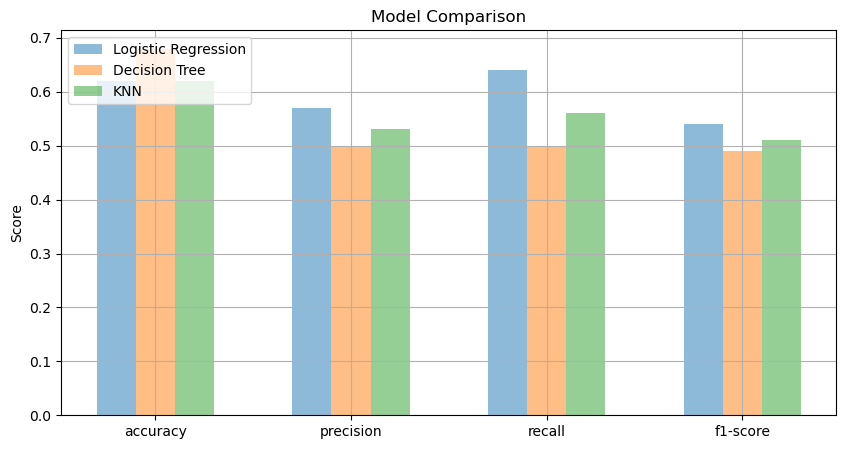

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Real metrics from the classification reports
logistic_regression_metrics = {'accuracy': 0.62, 'precision': 0.57, 'recall': 0.64, 'f1-score': 0.54}
decision_tree_metrics = {'accuracy': 0.68, 'precision': 0.50, 'recall': 0.50, 'f1-score': 0.49}
knn_metrics = {'accuracy': 0.62, 'precision': 0.53, 'recall': 0.56, 'f1-score': 0.51}

# Metrics
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
logistic_regression_values = list(logistic_regression_metrics.values())
decision_tree_values = list(decision_tree_metrics.values())
knn_values = list(knn_metrics.values())

# Setting the positions and width for the bars
pos = list(range(len(metrics)))
width = 0.2 

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

plt.bar([p - width for p in pos], logistic_regression_values, width, alpha=0.5, label='Logistic Regression')
plt.bar(pos, decision_tree_values, width, alpha=0.5, label='Decision Tree')
plt.bar([p + width for p in pos], knn_values, width, alpha=0.5, label='KNN')

# Setting axis labels, title, and position of the x ticks
ax.set_ylabel('Score')
ax.set_title('Model Comparison')
ax.set_xticks([p for p in pos])
ax.set_xticklabels(metrics)

# Adding the legend and showing the plot
plt.legend(['Logistic Regression', 'Decision Tree', 'KNN'], loc='upper left')
plt.grid()
plt.show()


### Visual Analysis of Model Performance

- **Accuracy**: This metric reflects the overall ability of the model to correctly classify both default and non-default loans. A higher accuracy rate indicates that the model is performing well across all predictions.

- **Precision**: Precision for the 'Default' class shows us the proportion of actual defaults out of all predicted defaults. This is crucial for financial institutions as it measures the cost-effectiveness of the model in identifying risky loans.

- **Recall**: Recall for the 'Default' class indicates the model's ability to identify all potential defaults. A high recall is essential to ensure that high-risk loans are not sanctioned.

- **F1-Score**: The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both the concerns of precision and recall in one number.

Taking this into consideration the Logitic Regression model seems to be the best model.

## Conclusion and Next Steps <a class="anchor" id="conclusion"></a>

In this project, we conducted extensive data preprocessing, feature engineering, and developed baseline models for predicting loan defaults. Moving forward, we will focus on refining our models through hyperparameter tuning, experimenting with ensemble methods, and exploring advanced techniques like deep learning. Our goal is to enhance model performance while ensuring they are robust and reliable for practical applications in financial risk assessment.

## Saving the Data <a class="anchor" id="saving"></a>
Now that we have spent the time modeling this dataset, we are going to save it for future use. We will be using our dataset to carry out further modeling work to learn more about the dataset!

In [75]:
# Save the data to a csv file for future use

df.to_csv('Modeled_Loan_Data.csv', index=False)